# Dependencies

In [401]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM #Note: SVM are better with small sample size

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.exceptions import NotFittedError

pd.set_option('display.float_format', lambda x: '%.3f' % x) 
pd.set_option('display.colheader_justify', 'center')

sns.set()

# Data Preprocessing

In [402]:
data = pd.read_csv('creditcard.csv')
df = data.copy()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,...,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,...,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,...,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,...,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,...,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


In [403]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [404]:
df[df.isnull().any(axis=1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [405]:
round(df.corr(),1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,0.100,-0.000,-0.400,-0.100,0.200,-0.100,0.100,-0.000,-0.000,...,0.000,0.100,0.100,-0.000,-0.200,-0.000,-0.000,-0.000,-0.000,-0.000
V1,0.100,1.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,...,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.200,-0.100
V2,-0.000,0.000,1.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,...,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.500,0.100
V3,-0.400,-0.000,0.000,1.000,0.000,-0.000,0.000,0.000,-0.000,0.000,...,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.200,-0.200
V4,-0.100,-0.000,-0.000,0.000,1.000,-0.000,-0.000,-0.000,0.000,0.000,...,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.100,0.100
V5,0.200,0.000,0.000,-0.000,-0.000,1.000,0.000,0.000,0.000,0.000,...,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.400,-0.100
V6,-0.100,-0.000,0.000,0.000,-0.000,0.000,1.000,0.000,-0.000,0.000,...,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.200,-0.000
V7,0.100,-0.000,0.000,0.000,-0.000,0.000,0.000,1.000,0.000,0.000,...,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.400,-0.200
V8,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,1.000,0.000,...,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.100,0.000
V9,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,...,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.100


<AxesSubplot:>

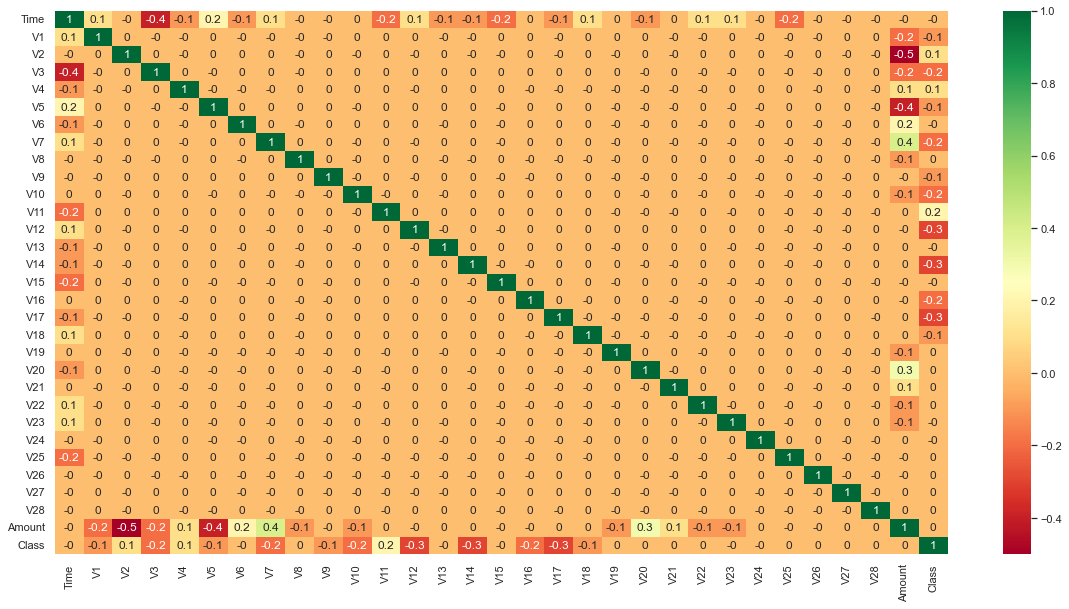

In [406]:
plt.figure(figsize=(20,10))
sns.heatmap(round(df.corr(),1),annot=True,cmap="RdYlGn")

In [407]:
df_fraud1 = df[df['Class'] == 1]
df_fraud0 = df[df['Class'] == 0]

df_fraud1.shape, df_fraud0.shape

((492, 31), (284315, 31))

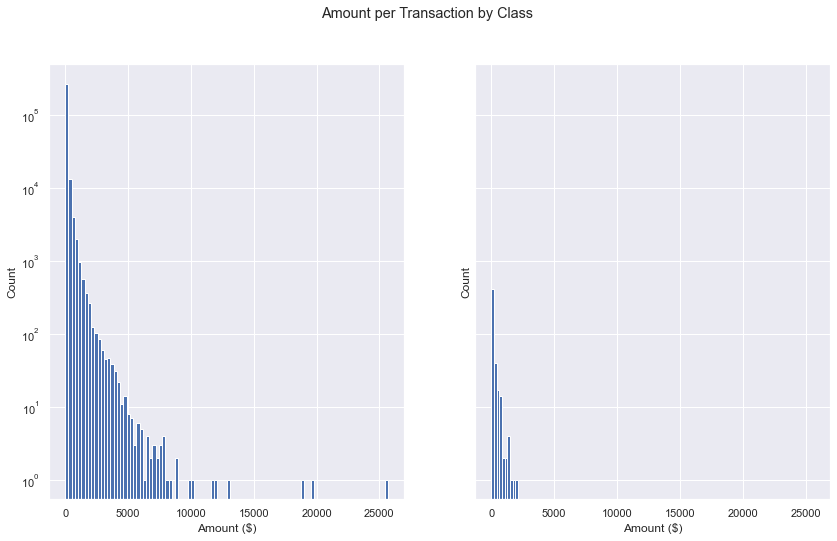

In [408]:
fig, ax = plt.subplots(1,2, sharex= True, sharey=True)
fig.suptitle('Amount per Transaction by Class')
ax[0].hist(x=df_fraud0['Amount'], bins=100)
ax[1].hist(x=df_fraud1['Amount'], bins=10)
ax[0].set_xlabel('Amount ($)')
ax[1].set_xlabel('Amount ($)')
ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count')

plt.yscale('log')

In [409]:
df_fraud0_sample = df_fraud0.sample(frac= 0.003, random_state=42)
df_fraud0_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
138028,82450.000,1.315,0.591,-0.667,0.717,0.302,-1.125,0.389,-0.288,-0.132,...,-0.170,-0.430,-0.141,-0.200,0.639,0.399,-0.034,0.032,0.760,0
63099,50554.000,-0.799,1.185,0.905,0.695,0.219,-0.319,0.495,0.139,-0.760,...,0.202,0.579,-0.092,0.014,-0.246,-0.380,-0.396,-0.113,4.180,0
73411,55125.000,-0.391,-0.246,1.122,-1.309,-0.640,0.009,-0.701,-0.027,-2.629,...,-0.133,0.117,-0.192,-0.489,-0.310,0.008,0.164,0.240,15.000,0
164247,116572.000,-0.060,1.065,-0.987,-0.030,0.176,-1.349,0.776,0.135,-0.150,...,0.356,0.908,-0.018,-0.126,-0.340,-0.150,-0.024,0.042,57.000,0
148999,90434.000,1.848,0.373,0.269,3.866,0.088,0.970,-0.722,0.236,0.683,...,0.104,0.621,0.197,0.692,-0.207,-0.021,-0.020,-0.043,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103122,68506.000,1.134,0.111,0.277,1.207,0.041,0.328,-0.053,0.167,0.095,...,-0.072,-0.030,-0.116,-0.295,0.666,-0.310,0.033,0.003,13.840,0
216576,140536.000,0.009,1.350,0.813,2.869,0.897,-0.080,1.034,-0.077,-1.597,...,0.375,1.141,-0.258,0.003,-0.039,0.171,0.044,0.043,10.620,0
29319,35418.000,-0.874,1.201,1.251,0.918,-0.250,-0.324,0.502,0.302,-0.799,...,0.100,0.303,-0.018,0.487,-0.525,0.722,-0.149,0.091,40.150,0
5982,6672.000,-1.738,-0.980,2.149,-0.745,-1.014,-0.329,-1.225,0.533,1.059,...,0.200,0.881,-0.509,0.663,0.174,-0.206,0.002,-0.359,67.430,0


In [410]:
df_fraud01 = shuffle(pd.concat([df_fraud0_sample, df_fraud1])).reset_index(drop=True)
df_fraud01

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,14472.000,1.188,-0.188,0.703,0.092,-0.535,0.118,-0.714,0.177,1.686,...,-0.025,0.134,-0.021,-0.313,0.107,1.068,-0.085,-0.014,12.950,0
1,91502.000,0.007,2.365,-2.600,1.112,3.276,-1.776,2.115,-0.830,0.900,...,-0.564,-0.902,-0.404,-0.013,0.590,-0.734,-0.448,-0.362,1.000,1
2,44545.000,1.120,-0.238,0.183,0.016,-0.647,-1.124,0.153,-0.303,0.171,...,0.078,0.075,-0.135,0.499,0.358,1.091,-0.102,0.018,97.990,0
3,47545.000,1.177,0.557,-0.491,0.756,0.249,-0.782,0.229,-0.041,-0.432,...,-0.062,-0.128,-0.040,0.110,0.438,0.369,-0.018,0.031,0.760,1
4,52037.000,0.911,-0.258,1.096,1.359,-0.967,-0.362,-0.268,-0.057,0.310,...,0.198,0.343,-0.138,0.419,0.321,-0.379,0.043,0.067,144.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,70071.000,-0.440,1.137,-3.227,3.242,-2.034,-1.618,-3.028,0.765,-1.802,...,0.764,-0.276,-0.344,0.233,0.606,-0.315,0.768,0.460,227.300,1
1341,150494.000,1.853,1.070,-1.776,4.617,0.770,-0.401,-0.041,0.090,-0.218,...,-0.158,-0.176,0.027,-0.468,0.058,0.148,0.042,0.041,1.000,1
1342,120108.000,-0.667,0.242,0.047,-1.737,2.320,4.067,-0.348,1.157,0.396,...,0.210,0.694,-0.136,0.757,-0.295,0.562,0.254,0.228,23.000,0
1343,64829.000,-2.131,-2.337,1.513,-1.603,-0.189,-0.155,0.933,0.020,1.218,...,0.527,0.663,0.775,-0.393,0.581,-0.708,-0.221,-0.074,443.000,0


In [411]:
df_fraud01.rename(columns={'Class':'Fraud'}, inplace=True)

In [412]:
x = df_fraud01.drop('Fraud', axis=1)
y = df_fraud01['Fraud']

In [413]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [414]:
x_train.iloc[:,0], y_train

(394    141893.000
 543    133184.000
 370     67281.000
 551     62610.000
 1330    48092.000
           ...    
 1095   109252.000
 1130   146026.000
 1294    41784.000
 860     63822.000
 1126   155516.000
 Name: Time, Length: 1076, dtype: float64,
 394     0
 543     1
 370     0
 551     0
 1330    0
        ..
 1095    0
 1130    1
 1294    0
 860     0
 1126    0
 Name: Fraud, Length: 1076, dtype: int64)

# Modelling

In [415]:
pipelines ={
    'Isolation_Forest':make_pipeline(IsolationForest()), 
    'Local_Outlier_Factor':make_pipeline(LocalOutlierFactor()),
    'One_Class_SVM':make_pipeline(OneClassSVM())
}

pipelines

{'Isolation_Forest': Pipeline(steps=[('isolationforest', IsolationForest())]),
 'Local_Outlier_Factor': Pipeline(steps=[('localoutlierfactor', LocalOutlierFactor())]),
 'One_Class_SVM': Pipeline(steps=[('oneclasssvm', OneClassSVM())])}

In [417]:
fit_models = {}

for algo, pipe in pipelines.items():  
    try:
        print('Starting training for {}.'.format(algo))
        pipe.fit(x_train, y_train)
        fit_models[algo] = pipe
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))

Starting training for Isolation_Forest.
Isolation_Forest has been successfully fit.
Starting training for Local_Outlier_Factor.
Local_Outlier_Factor has been successfully fit.
Starting training for One_Class_SVM.
One_Class_SVM has been successfully fit.


In [424]:
try: 
    print(fit_models['Local_Outlier_Factor'].predict(x_test))
except:
    print('Except')
    print(fit_models['Local_Outlier_Factor'].fit_predict(x_test))

Except
[ 1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1]


In [425]:
try: 
    print(np.vectorize(lambda x: x-1 if x==1 else (x+2 if x==-1 else x))(fit_models['Local_Outlier_Factor'].predict(x_test)))
except:
    print('Except')
    print(np.vectorize(lambda x: x-1 if x==1 else (x+2 if x==-1 else x))(fit_models['Local_Outlier_Factor'].fit_predict(x_test)))



Except
[0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]


# Evaluation

In [427]:
cm_models = {}

for model,algo in fit_models.items():

    try:
        yhat = np.vectorize(lambda x: x-1 if x==1 else (x+2 if x==-1 else x))(algo.predict(x_test))
    except:
        yhat = np.vectorize(lambda x: x-1 if x==1 else (x+2 if x==-1 else x))(algo.fit_predict(x_test))

    print ('Confusion Matrix for {} Model'.format(model.upper()))
    print(confusion_matrix(y_test, yhat))
    cm_models[model] = confusion_matrix(y_test, yhat)

Confusion Matrix for ISOLATION_FOREST Model
[[166   1]
 [ 77  25]]
Confusion Matrix for LOCAL_OUTLIER_FACTOR Model
[[161   6]
 [101   1]]
Confusion Matrix for ONE_CLASS_SVM Model
[[84 83]
 [53 49]]


In [428]:
target = ['0', '1'] #0, 1

for model,matrix in cm_models.items():
    print ('\n-------- Confusion Matrix DataFrame for {} --------\n'.format(model.upper()))
    print (pd.DataFrame(data=matrix, columns=['Predicted ' + t for t in target], index=['True ' + t for t in target]))


-------- Confusion Matrix DataFrame for ISOLATION_FOREST --------

        Predicted 0  Predicted 1
True 0      166           1     
True 1       77          25     

-------- Confusion Matrix DataFrame for LOCAL_OUTLIER_FACTOR --------

        Predicted 0  Predicted 1
True 0      161           6     
True 1      101           1     

-------- Confusion Matrix DataFrame for ONE_CLASS_SVM --------

        Predicted 0  Predicted 1
True 0      84           83     
True 1      53           49     


In [429]:
df_results = pd.DataFrame(columns=["Prediction Rate",'Missclassification Rate'], index=['Isolation_Forest','Local Outlier Factor','One Class SVM'])

In [450]:
idx = 0

for model,algo in fit_models.items():

    try:
        yhat = np.vectorize(lambda x: x-1 if x==1 else (x+2 if x==-1 else x))(algo.predict(x_test))
    except:
        yhat = np.vectorize(lambda x: x-1 if x==1 else (x+2 if x==-1 else x))(algo.fit_predict(x_test))

    df_results.iloc[idx,0] = accuracy_score(y_test,yhat)
    df_results.iloc[idx,1] = abs(accuracy_score(y_test,yhat)-1)
    idx += 1
    print ('{}\n{} | {}'.format(model, accuracy_score(y_test,yhat),abs(accuracy_score(y_test,yhat)-1)))

df_results

Isolation_Forest
0.7100371747211895 | 0.28996282527881045
Local_Outlier_Factor
0.6022304832713755 | 0.3977695167286245
One_Class_SVM
0.4944237918215613 | 0.5055762081784387


,Prediction Rate,Missclassification Rate
Isolation_Forest,0.710,0.290
Local Outlier Factor,0.602,0.398
One Class SVM,0.494,0.506
